In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

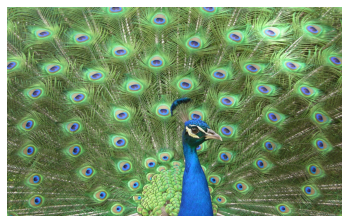

In [18]:
img = plt.imread("peacock.jpg")
plt.imshow(img)
plt.axis('off')
plt.show()

In [19]:
type(img)

numpy.ndarray

In [20]:
print(img.shape)
print(img.size)

(800, 1283, 3)
3079200


In [22]:
w,h,d = img.shape
image_array = img.reshape(w*h, d)
print(image_array.shape)
#normalize in range of (0,1)
image_array = image_array/255

(1026400, 3)


In [23]:
from sklearn.utils import shuffle
#fitting model on a small sub of the complete image
image_array_sample = shuffle(image_array,random_state=1)[:1000]
image_array_sample.size

3000

In [25]:
kmeans = KMeans(n_clusters=6,random_state=1)
kmeans.fit(image_array_sample)

KMeans(n_clusters=6, random_state=1)

In [26]:
labels = kmeans.predict(image_array)
labels

array([5, 0, 0, ..., 0, 4, 4])

In [27]:
print(kmeans.cluster_centers_)
c = kmeans.cluster_centers_

[[0.43281283 0.54344385 0.3556934 ]
 [0.2        0.26573711 0.12519971]
 [0.21505034 0.46846847 0.83402226]
 [0.67740642 0.86042781 0.62825312]
 [0.330385   0.41227995 0.24051811]
 [0.52861103 0.70514321 0.46171851]]


In [28]:
#recreate original image according to labels and each pixels
def recreate_image(c,labels,w,h,d):
    image = np.zeros((w,h,d))
    label_idx=0
#now label each pixels according to the limited labels
    for i in range(w):
        for j in range(h):
            image[i][j] = c[labels[label_idx]]
            #print(labels[label_idx])
            label_idx+=1
    return(image)

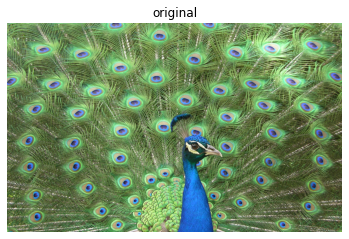

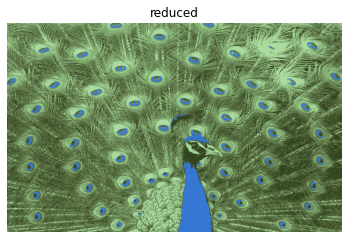

In [29]:
plt.figure(1)
plt.axis('off')
plt.title("original")
plt.imshow(img)
plt.show()
plt.figure(2)
plt.axis('off')
plt.title("reduced")
plt.imshow(recreate_image(c,labels,w,h,d))
plt.show()